In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option("display.max_columns", None)
plt.style.use("default")

In [8]:
df=pd.read_csv("../data/raw/products.csv")
df.head()

C:\Users\MUKESH S\AppData\Local\Temp\ipykernel_35676\2455768714.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../data/raw/products.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [10]:
df.columns.to_list()

['index',
 'Order ID',
 'Date',
 'Status',
 'Fulfilment',
 'Sales Channel ',
 'ship-service-level',
 'Style',
 'SKU',
 'Category',
 'Size',
 'ASIN',
 'Courier Status',
 'Qty',
 'currency',
 'Amount',
 'ship-city',
 'ship-state',
 'ship-postal-code',
 'ship-country',
 'promotion-ids',
 'B2B',
 'fulfilled-by',
 'Unnamed: 22']

In [11]:
df.isna().sum().sort_values(ascending=False)

fulfilled-by          89698
promotion-ids         49153
Unnamed: 22           49050
currency               7795
Amount                 7795
Courier Status         6872
ship-country             33
ship-city                33
ship-state               33
ship-postal-code         33
Sales Channel             0
Fulfilment                0
Status                    0
Date                      0
Order ID                  0
index                     0
Style                     0
ship-service-level        0
Qty                       0
ASIN                      0
SKU                       0
Category                  0
Size                      0
B2B                       0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].min(), df['Date'].max()

(Timestamp('2022-03-31 00:00:00'), Timestamp('2022-06-29 00:00:00'))

In [20]:
required_columns = ['SKU','Date','Qty','Amount']
missing= [col for col in required_columns if col not in df.columns]
missing

[]

In [21]:
df['SKU'].nunique()

7195

In [22]:
df['SKU'].value_counts().head()

SKU
JNE3797-KR-L    773
JNE3797-KR-M    657
JNE3797-KR-S    587
JNE3405-KR-L    535
J0230-SKD-M     507
Name: count, dtype: int64

In [23]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


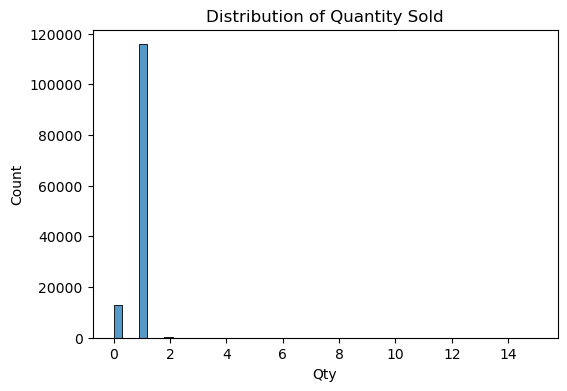

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(df['Qty'],bins=50)
plt.title('Distribution of Quantity Sold')
plt.show()

In [25]:
daily_sales = (df.groupby(['SKU','Date']).agg({'Qty':'sum','Amount':'sum'}).reset_index())
daily_sales.head()

,SKU,Date,Qty,Amount
0,AN201-RED-M,2022-04-07,1,229.0
1,AN201-RED-M,2022-05-01,1,229.0
2,AN201-RED-XL,2022-06-24,1,301.0
3,AN201-RED-XL,2022-06-26,1,301.0
4,AN201-RED-XXL,2022-05-03,1,229.0


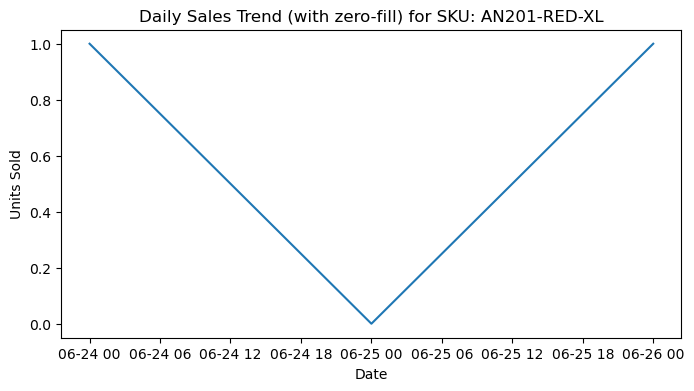

In [34]:
sample_sku = daily_sales['SKU'].iloc[3]

sample_df = daily_sales[daily_sales['SKU'] == sample_sku]

sku_df = daily_sales[daily_sales['SKU'] == sample_sku].copy()

date_range = pd.date_range(
    start=sku_df['Date'].min(),
    end=sku_df['Date'].max(),
    freq='D'
)

sku_df = (
    sku_df
    .set_index('Date')
    .reindex(date_range, fill_value=0)
    .rename_axis('Date')
    .reset_index()
)
plt.figure(figsize=(8,4))
plt.plot(sku_df['Date'], sku_df['Qty'])
plt.title(f"Daily Sales Trend (with zero-fill) for SKU: {sample_sku}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


